In [ ]:
import numpy as np
from os.path import exists
import sys
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import AutoMinorLocator

figureOutput='BindingEnergies'
error_on=0

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

rcParams['axes.linewidth']   = 2
rcParams['figure.figsize']   = 5,4
rcParams['figure.dpi']       = 600

rcParams['xtick.major.size']  = 7
rcParams['xtick.major.width'] = 1.5
rcParams['xtick.minor.size']  = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size']  = 7
rcParams['ytick.major.width'] = 1.5
rcParams['ytick.minor.size']  = 5
rcParams['ytick.minor.width'] = 1

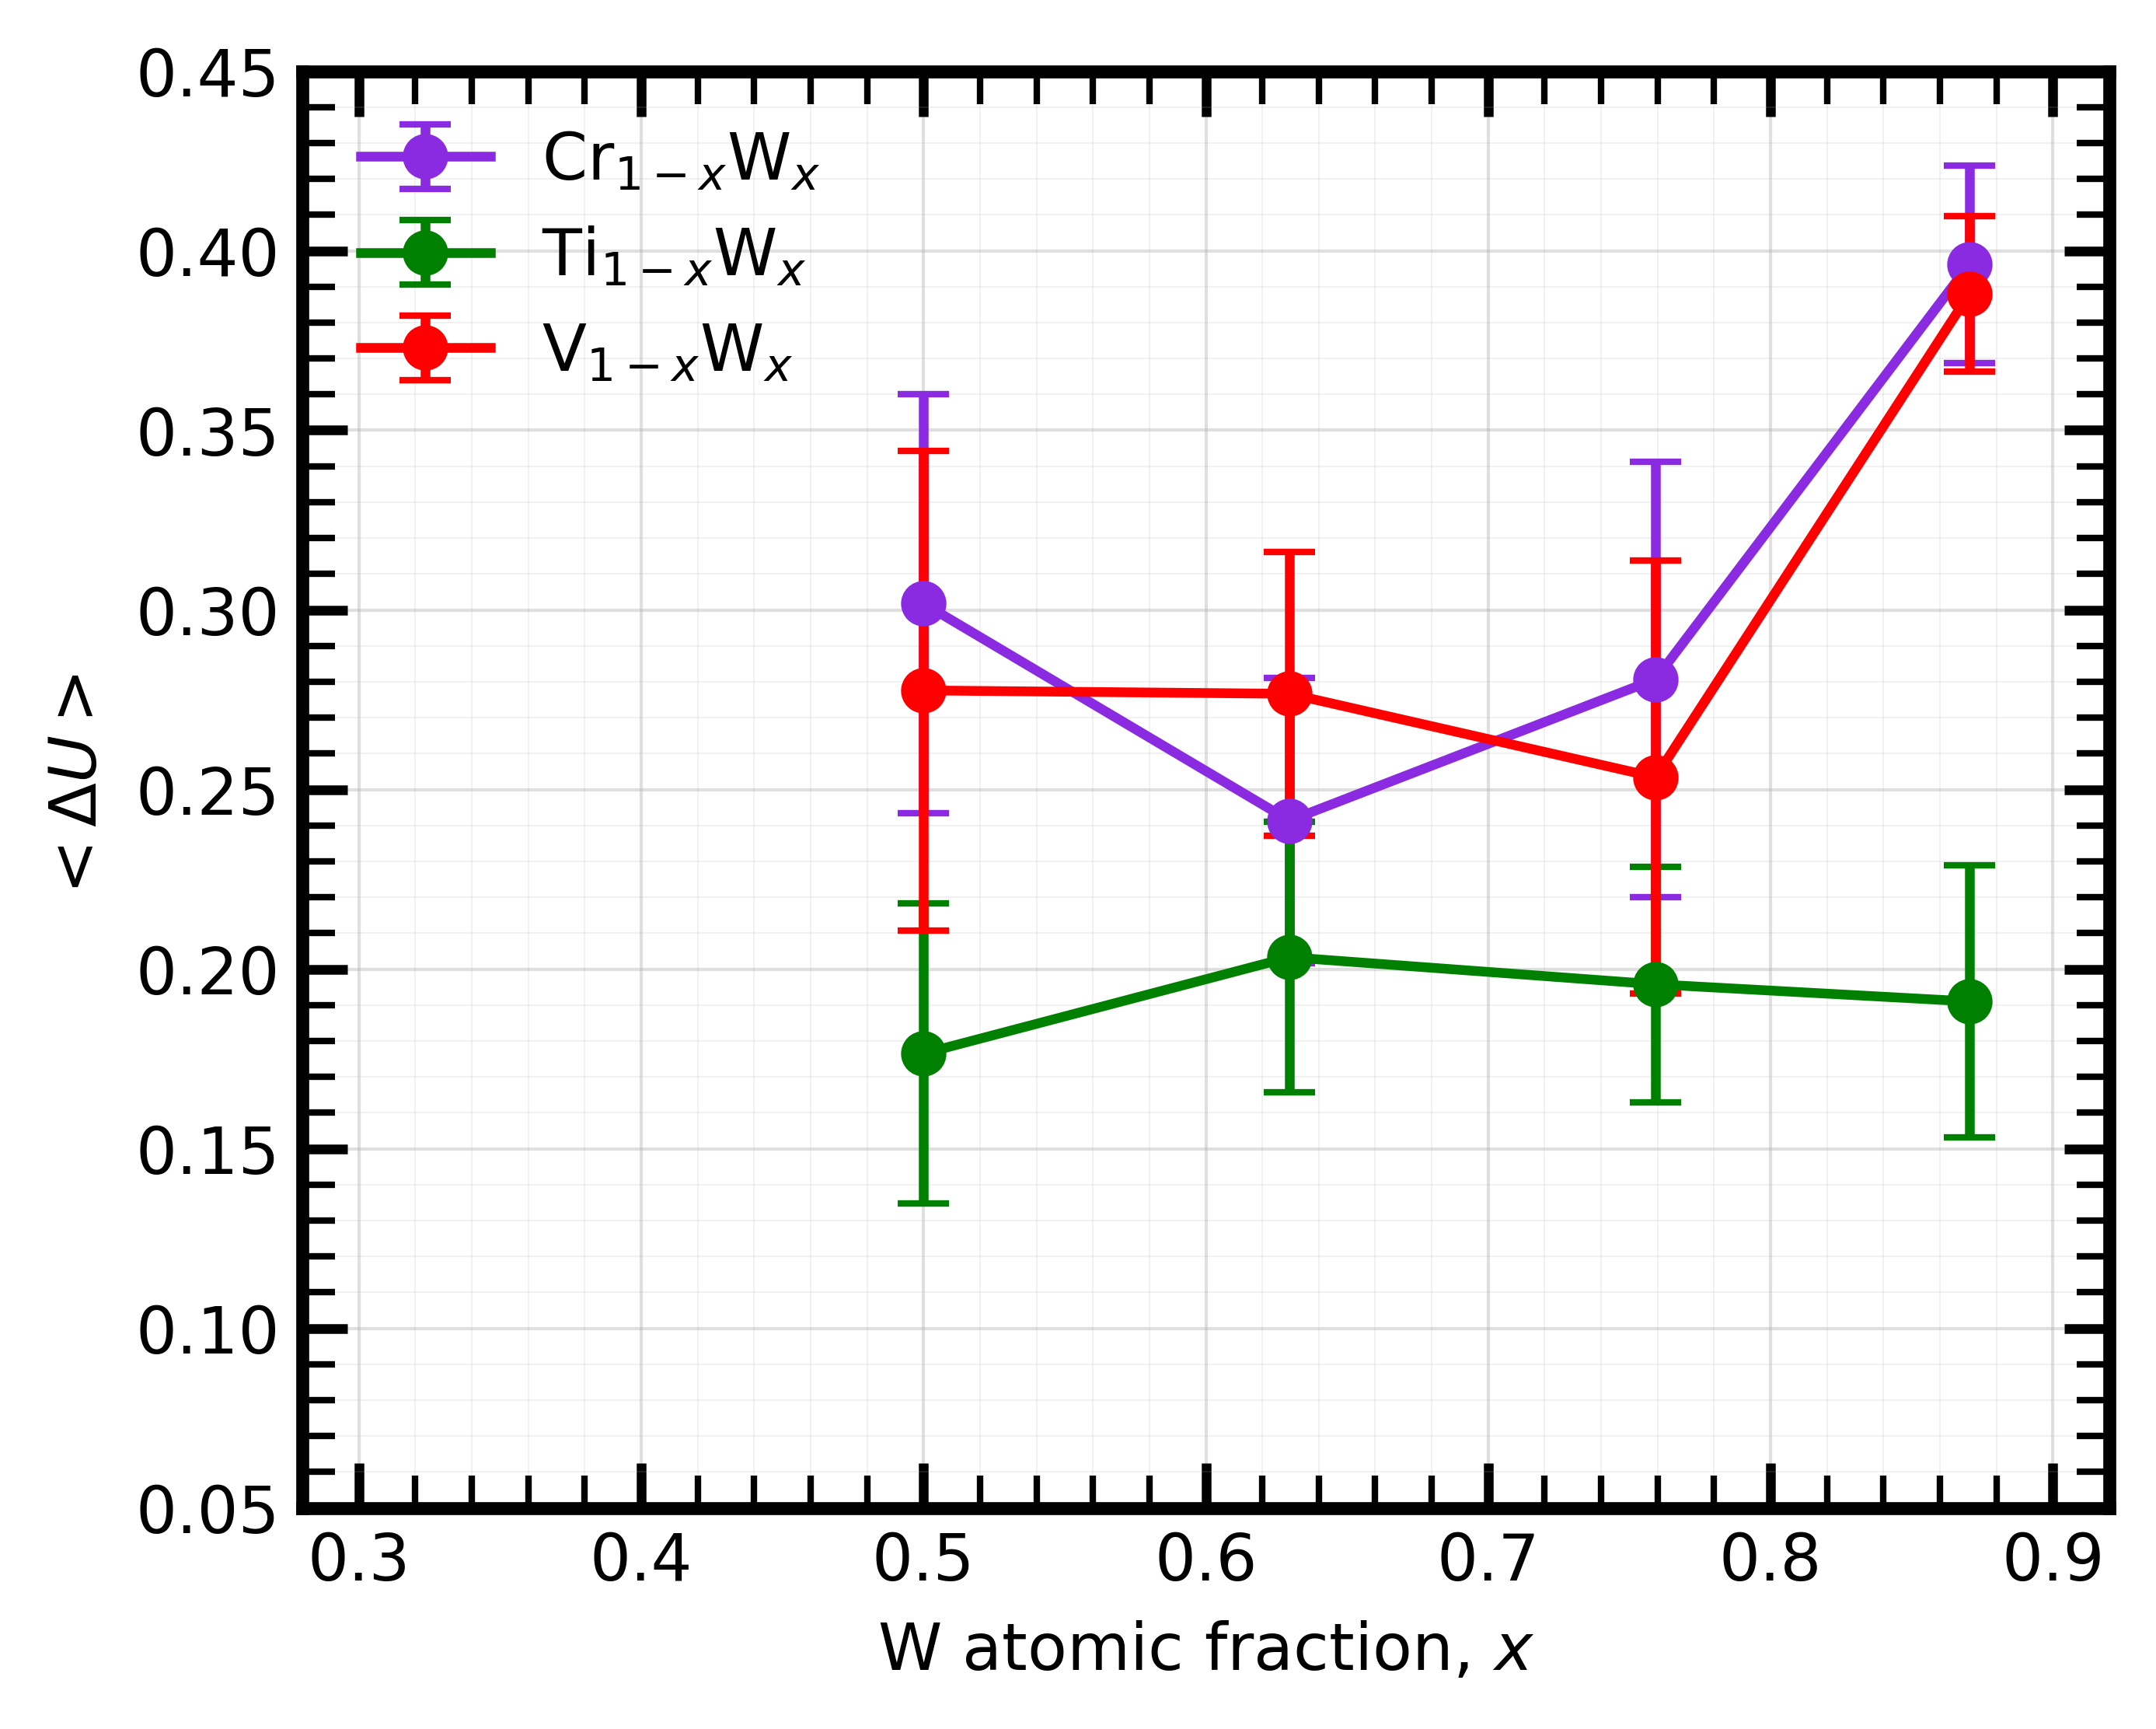

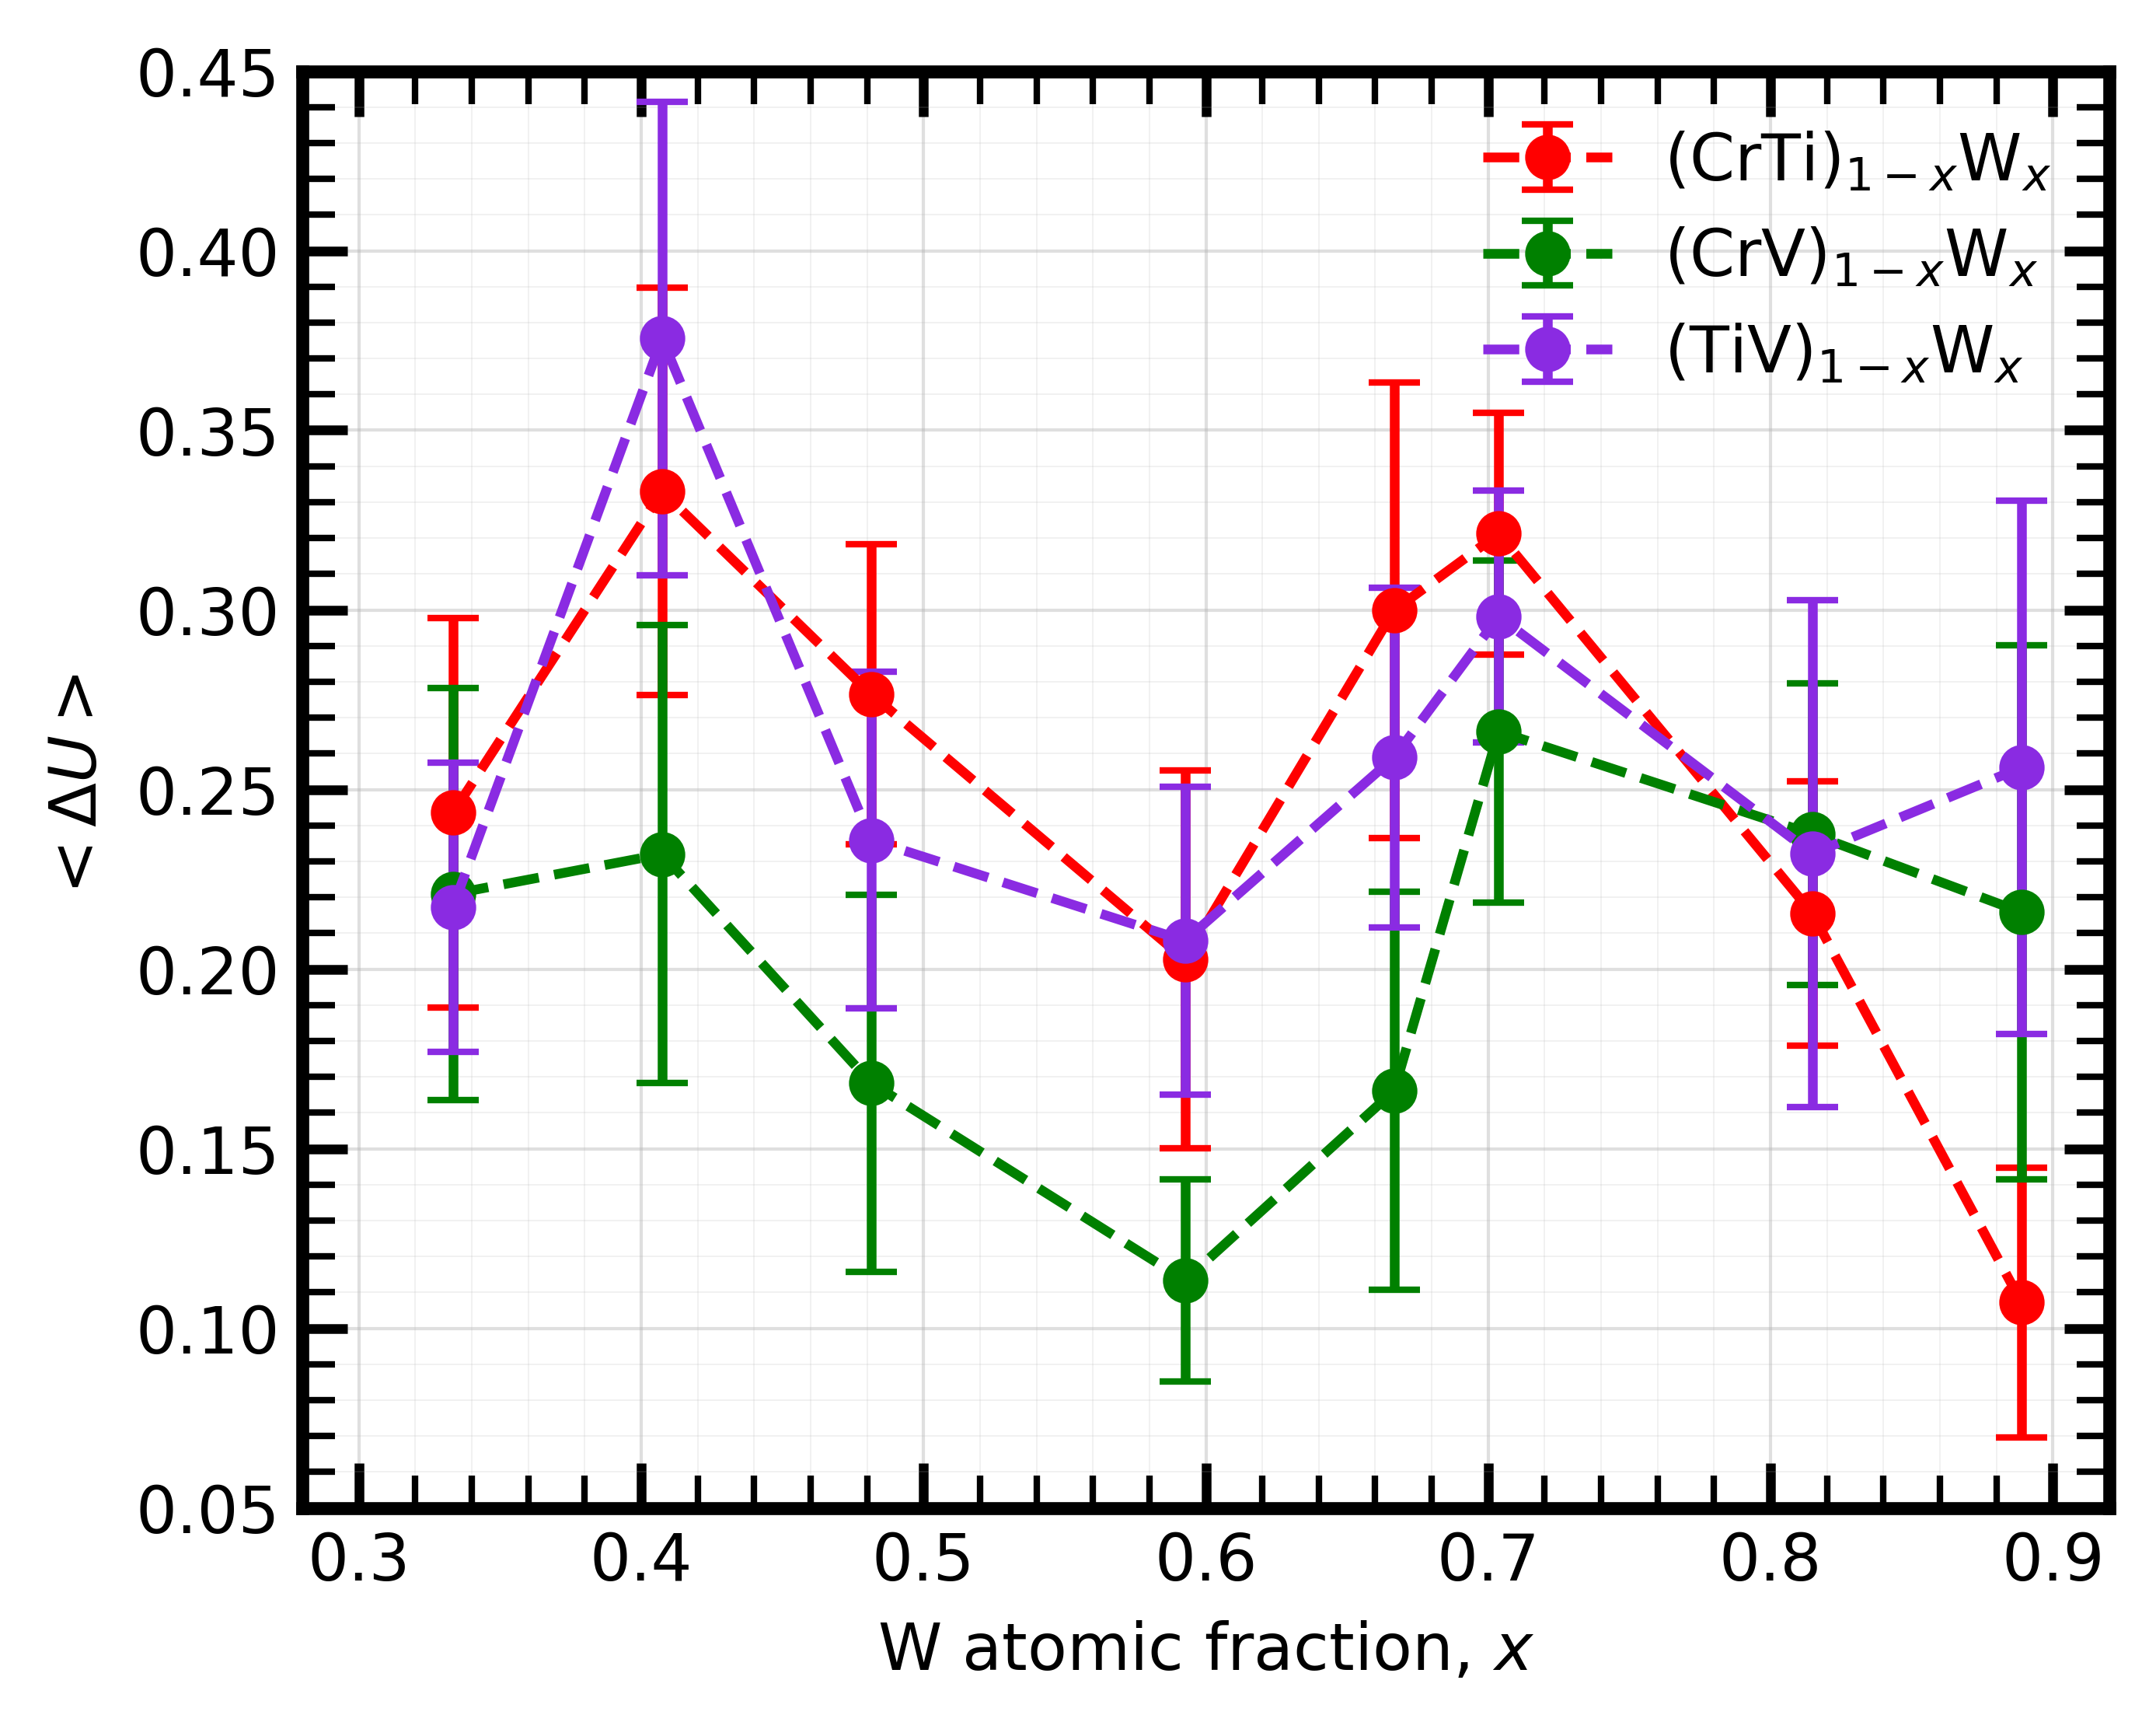

In [151]:
colors=['blueviolet','g','r','limegreen','pink','orangered','k','navy']
icolor=0
dirs=['Cr-W','Ti-W','V-W']
labels=['Cr$_{1-x}$W$_x$','Ti$_{1-x}$W$_x$','V$_{1-x}$W$_x$']
ax=plt.axes()
for idir,dir in enumerate(dirs):
    plotData=[]
    for wp in range(1,5):
        file='/pscratch/sd/k/kcpitike/MPEA/binaries/{:s}/{:s}/displacements.csv'.format(dir,str(wp))
        data = pd.read_csv(file)
        x=data['type'].to_list().count('W')/(54*5)
        plotData.append([x,np.mean(data['|d|']),np.std(data['|d|'])/2])
    plotData=np.transpose(plotData)
    plt.errorbar(plotData[0],plotData[1],marker='o',label=labels[idir],yerr=plotData[2], capsize=4,color=colors[icolor])
    icolor+=1
plt.legend(frameon=0)
plt.xlabel('W atomic fraction, $x$')
plt.ylabel('$<\Delta U>$')
plt.xlim([0.28,0.92])
plt.ylim([0.05,0.45])
ax.tick_params(axis='both',which='both',direction='in',colors='k',\
               bottom=True,top=True,left=True,right=True,\
               #labelbottom=True, labeltop=True, labelleft=True, labelright=True,\
               labelrotation=0)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(alpha=0.4,which='major',linewidth=0.5)
plt.grid(alpha=0.2,which='minor',linewidth=0.2)

colors=['r','g','blueviolet','g','r','limegreen','pink','orangered','k','navy']
icolor=0
plt.figure()
ax=plt.axes()
dirs=['Cr-Ti-W','Cr-V-W','Ti-V-W']
labels=['(CrTi)$_{1-x}$W$_x$','(CrV)$_{1-x}$W$_x$','(TiV)$_{1-x}$W$_x$']
#ax=plt.axes()
for idir,dir in enumerate(dirs):
    plotData=[]
    for wp in range(1,9):
        file='/pscratch/sd/k/kcpitike/MPEA/ternaries/{:s}/{:s}/displacements.csv'.format(dir,str(wp))
        data = pd.read_csv(file)
        x=data['type'].to_list().count('W')/(54*5)
        plotData.append([x,np.mean(data['|d|']),np.std(data['|d|'])/2])
    plotData=np.transpose(plotData)
    plt.errorbar(plotData[0],plotData[1],marker='o',label=labels[idir],yerr=plotData[2], capsize=4,color=colors[icolor],linestyle='--')
    icolor+=1
plt.legend(frameon=0)
plt.xlabel('W atomic fraction, $x$')
plt.ylabel('$<\Delta U>$')
plt.xlim([0.28,0.92])
plt.ylim([0.05,0.45])
ax.tick_params(axis='both',which='both',direction='in',colors='k',\
               bottom=True,top=True,left=True,right=True,\
               #labelbottom=True, labeltop=True, labelleft=True, labelright=True,\
               labelrotation=0)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(alpha=0.4,which='major',linewidth=0.5)
plt.grid(alpha=0.2,which='minor',linewidth=0.2)

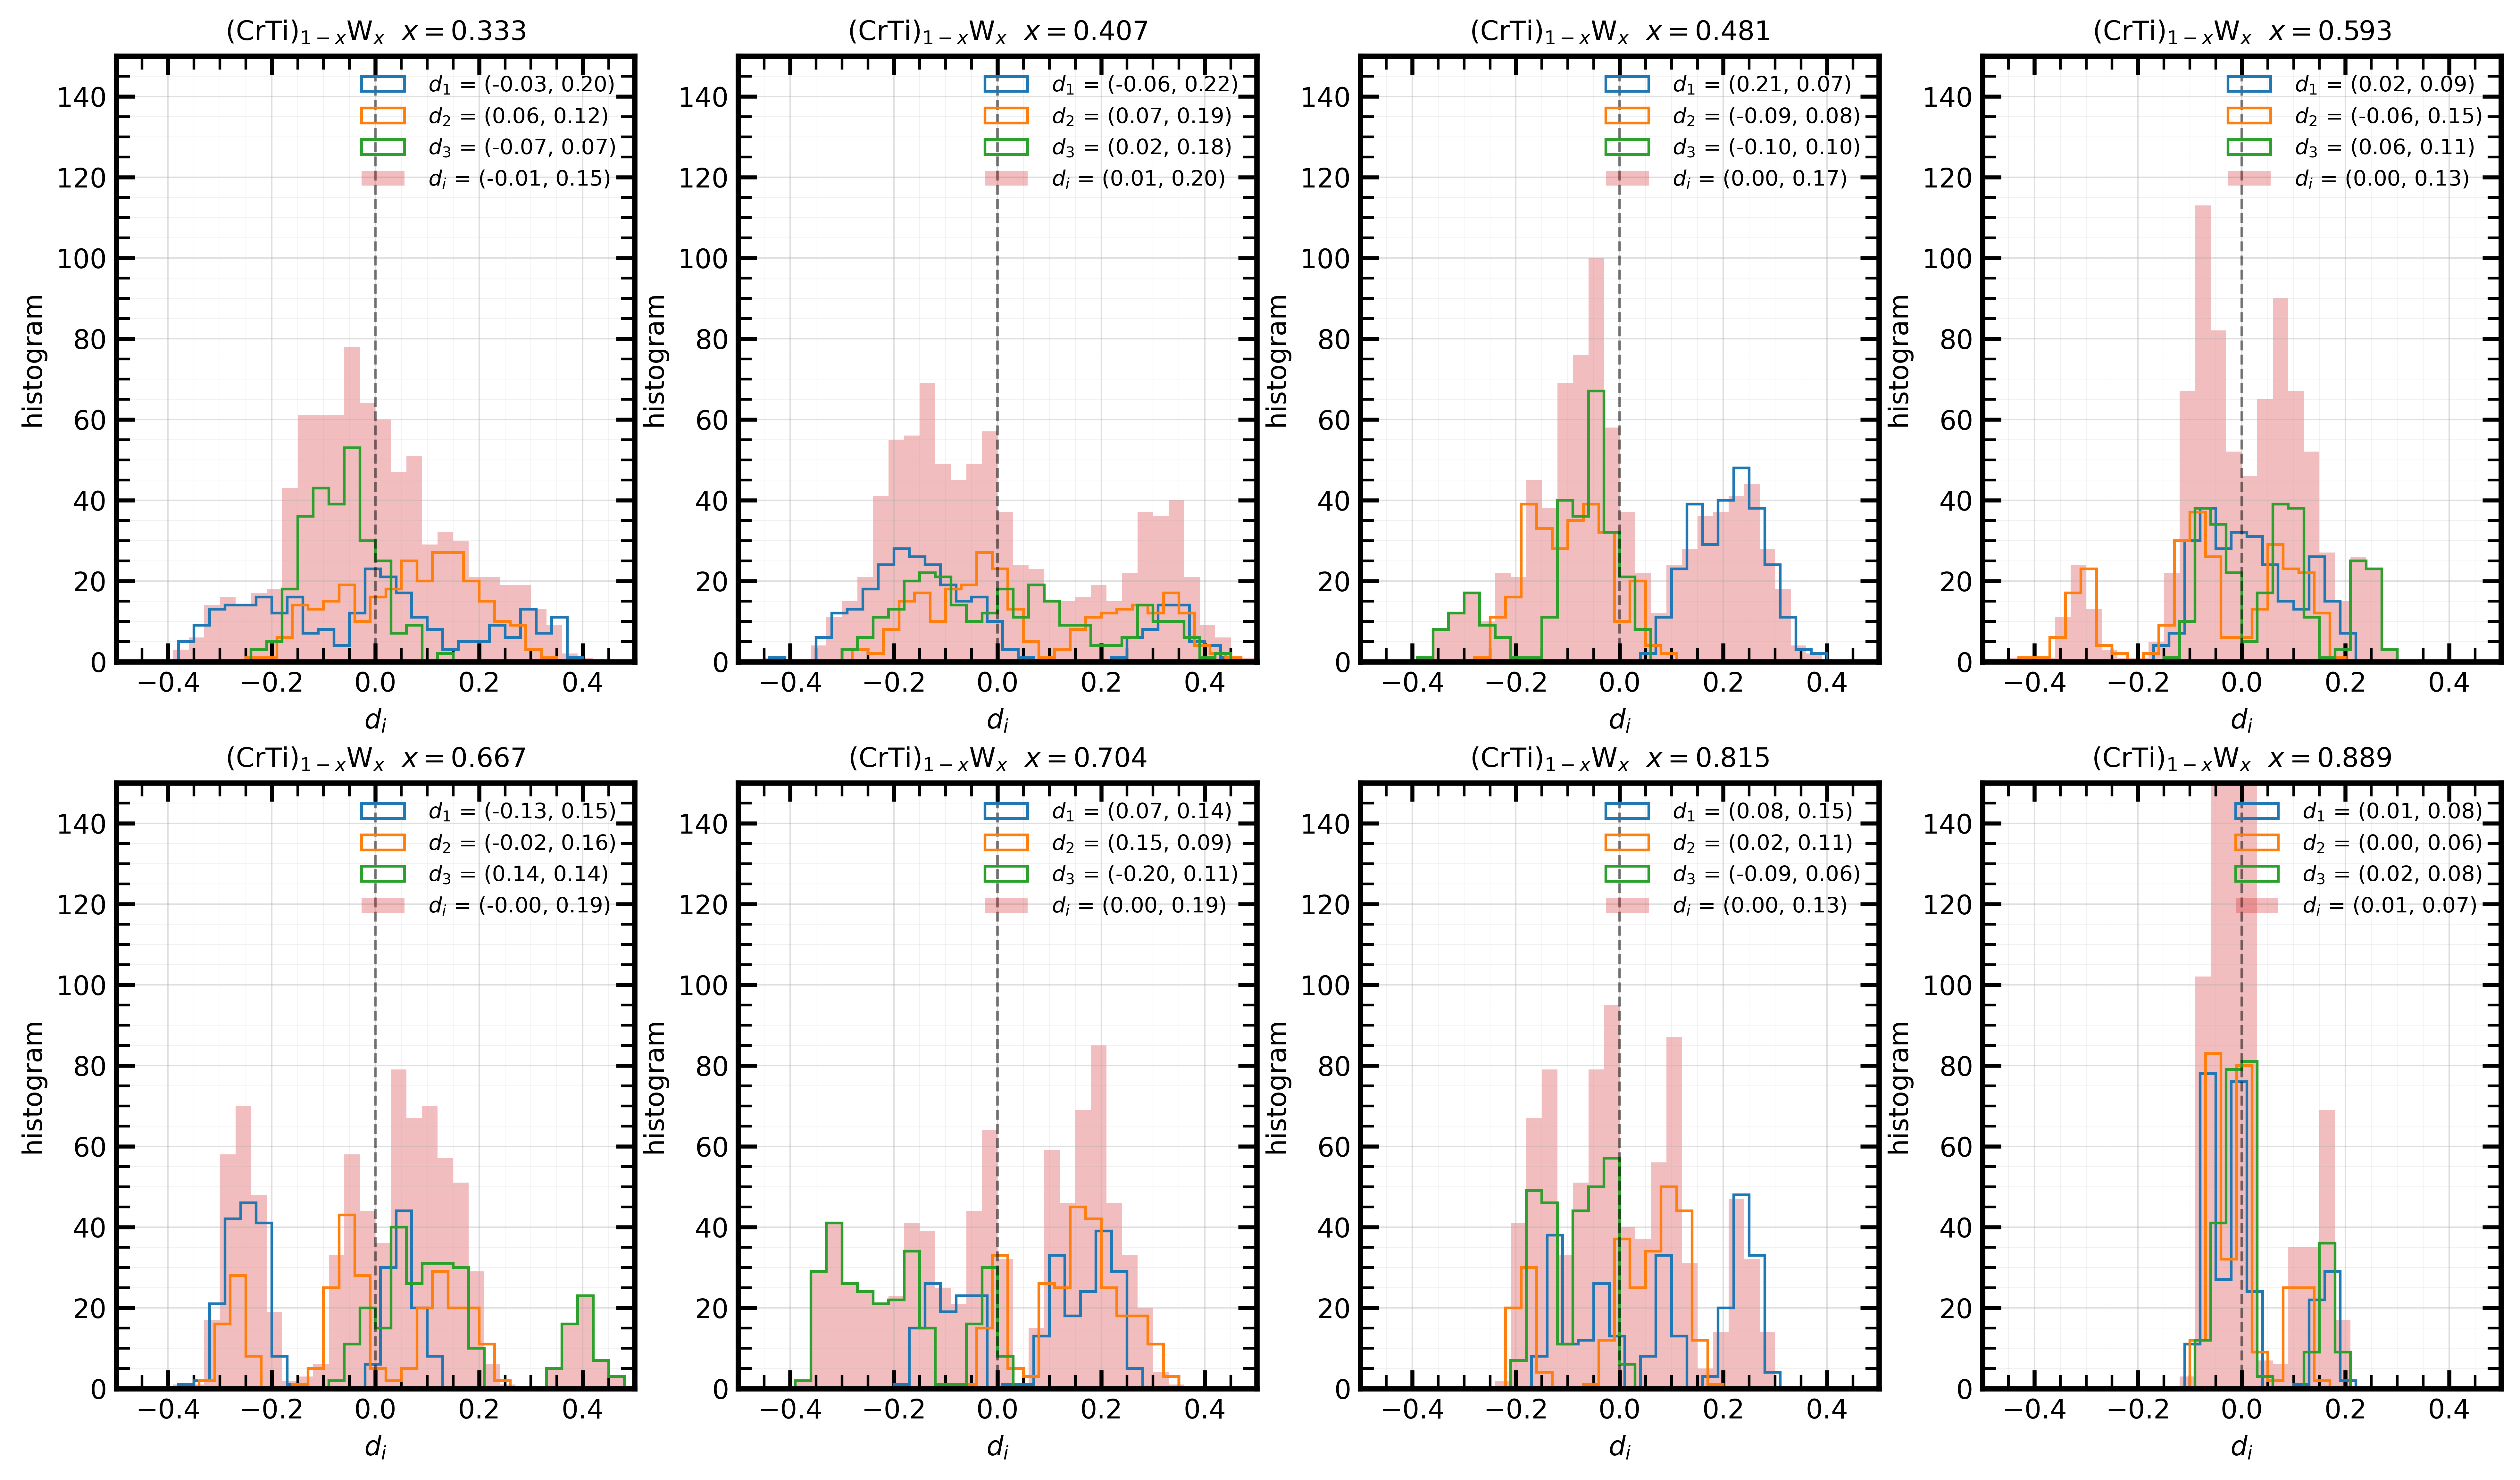

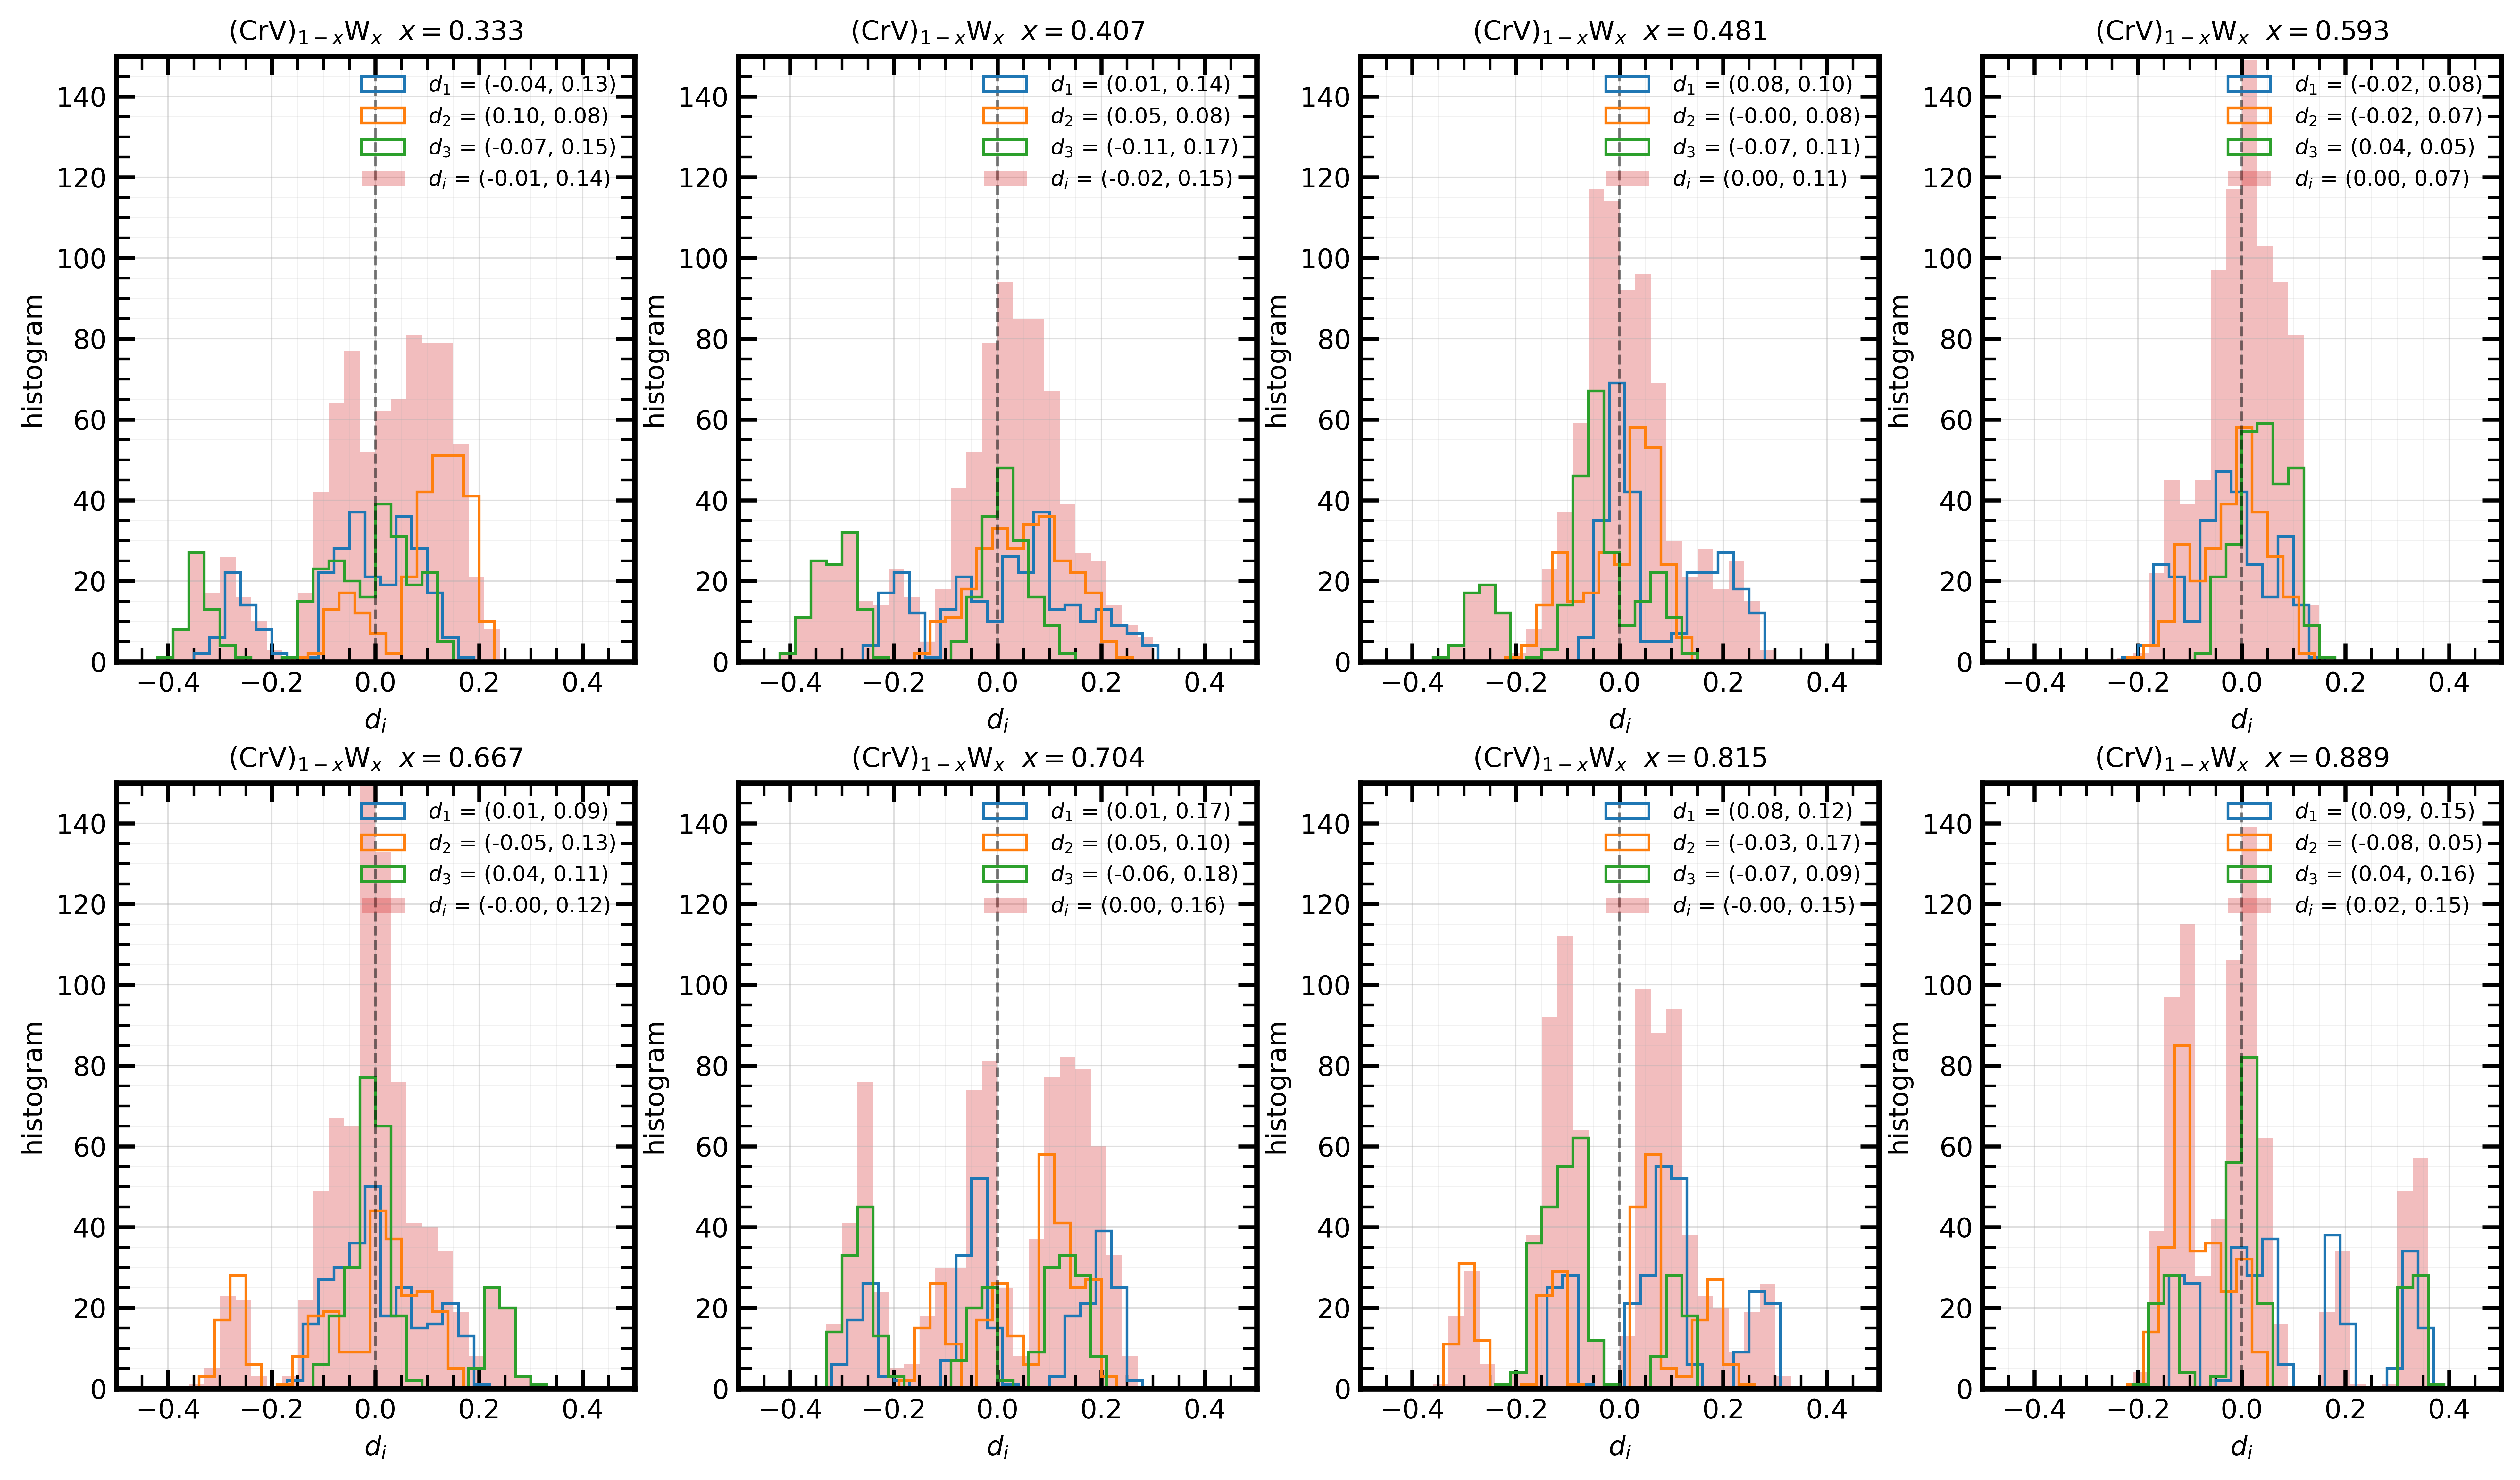

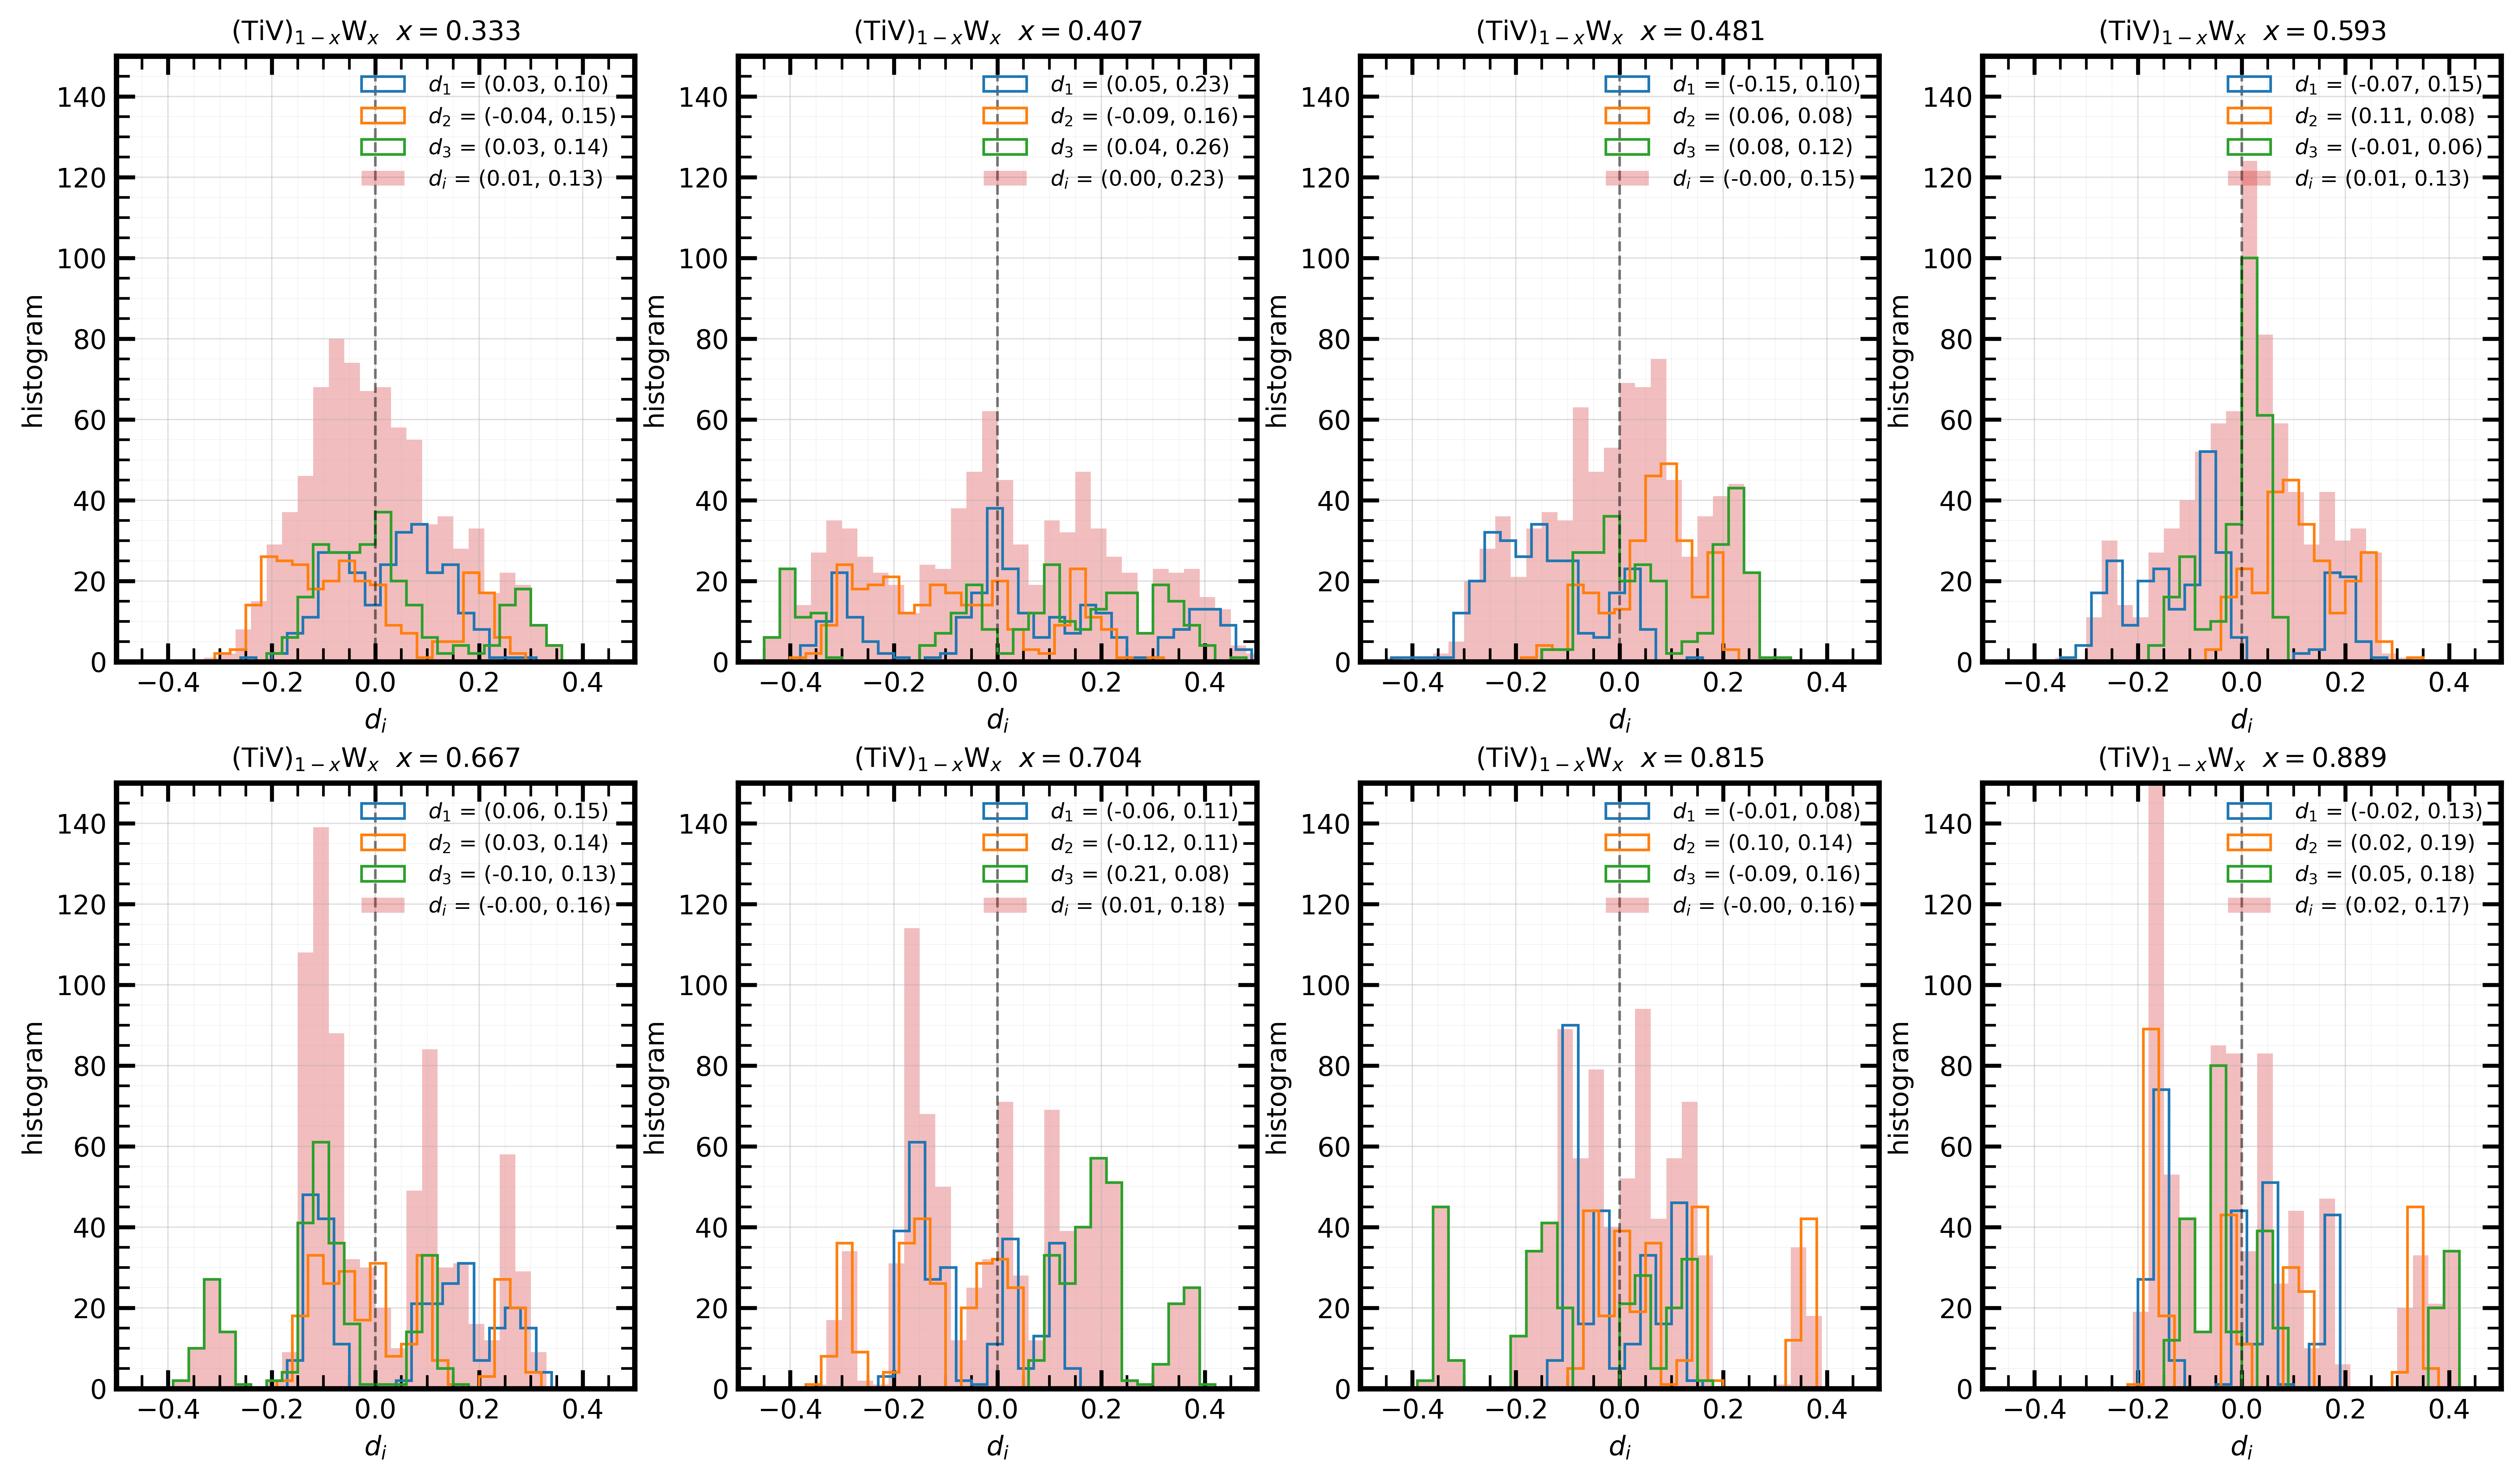

In [134]:
dirs=['Cr-Ti-W','Cr-V-W','Ti-V-W']
labels=['(CrTi)$_{1-x}$W$_x$','(CrV)$_{1-x}$W$_x$','(TiV)$_{1-x}$W$_x$']
for idir,dir in enumerate(dirs):
    plotData=[]
    fig, axes = plt.subplots(2, 4, figsize=(16, 9))
    axes=axes.flatten()
    bin_edges1 = np.arange(-0.5, 0.5, 0.03)
    bin_edges2 = np.arange(-0.5, 0.5, 0.03)+0.01
    bin_edges3 = np.arange(-0.5, 0.5, 0.03)+0.02
    for wp in range(1,9):
        file='/pscratch/sd/k/kcpitike/MPEA/ternaries/{:s}/{:s}/displacements.csv'.format(dir,str(wp))
        data = pd.read_csv(file)
        x=data['type'].to_list().count('W')/(54*5)
        axes[wp-1].hist(data['dx'],bins=bin_edges1,label=' $d_1$ = ({:0.2f}, {:0.2f})'.format(np.mean(data['dx']),np.std(data['dx'])),histtype='step')
        axes[wp-1].hist(data['dy'],bins=bin_edges2,label=' $d_2$ = ({:0.2f}, {:0.2f})'.format(np.mean(data['dy']),np.std(data['dy'])),histtype='step')
        axes[wp-1].hist(data['dz'],bins=bin_edges3,label=' $d_3$ = ({:0.2f}, {:0.2f})'.format(np.mean(data['dz']),np.std(data['dz'])),histtype='step')
        axes[wp-1].hist(np.array(data[['dx','dy','dz']]).flatten(),bins=bin_edges3,histtype='stepfilled',alpha=0.3,\
                 label=' $d_i$ = ({:0.2f}, {:0.2f})'.format(np.mean(np.array(data[['dx','dy','dz']])),np.std(np.array(data[['dx','dy','dz']]))))#+' $d_i$ = ({:0.2f}, {:0.2f})'.format(np.mean(data[['dx','dy','dz']]),np.std(data[['dx','dy','dz']])))
        axes[wp-1].axvline(x=0,linestyle='--',c='black',alpha=0.5,linewidth=1)
        axes[wp-1].legend(frameon=0,fontsize=8)
        axes[wp-1].set_xlabel('$d_i$')
        axes[wp-1].set_xlim([-0.5,0.5])
        axes[wp-1].set_ylim([0,150])
        axes[wp-1].set_ylabel('histogram')
        axes[wp-1].set_title(labels[idir]+'  $x={:0.3f}$'.format(x))

        axes[wp-1].tick_params(axis='both',which='both',direction='in',colors='k',\
                    bottom=True,top=True,left=True,right=True,\
                    #labelbottom=True, labeltop=True, labelleft=True, labelright=True,\
                    labelrotation=0)
        axes[wp-1].xaxis.set_minor_locator(AutoMinorLocator())
        axes[wp-1].yaxis.set_minor_locator(AutoMinorLocator())
        axes[wp-1].grid(alpha=0.4,which='major',linewidth=0.5)
        axes[wp-1].grid(alpha=0.2,which='minor',linewidth=0.2)
    plt.show()

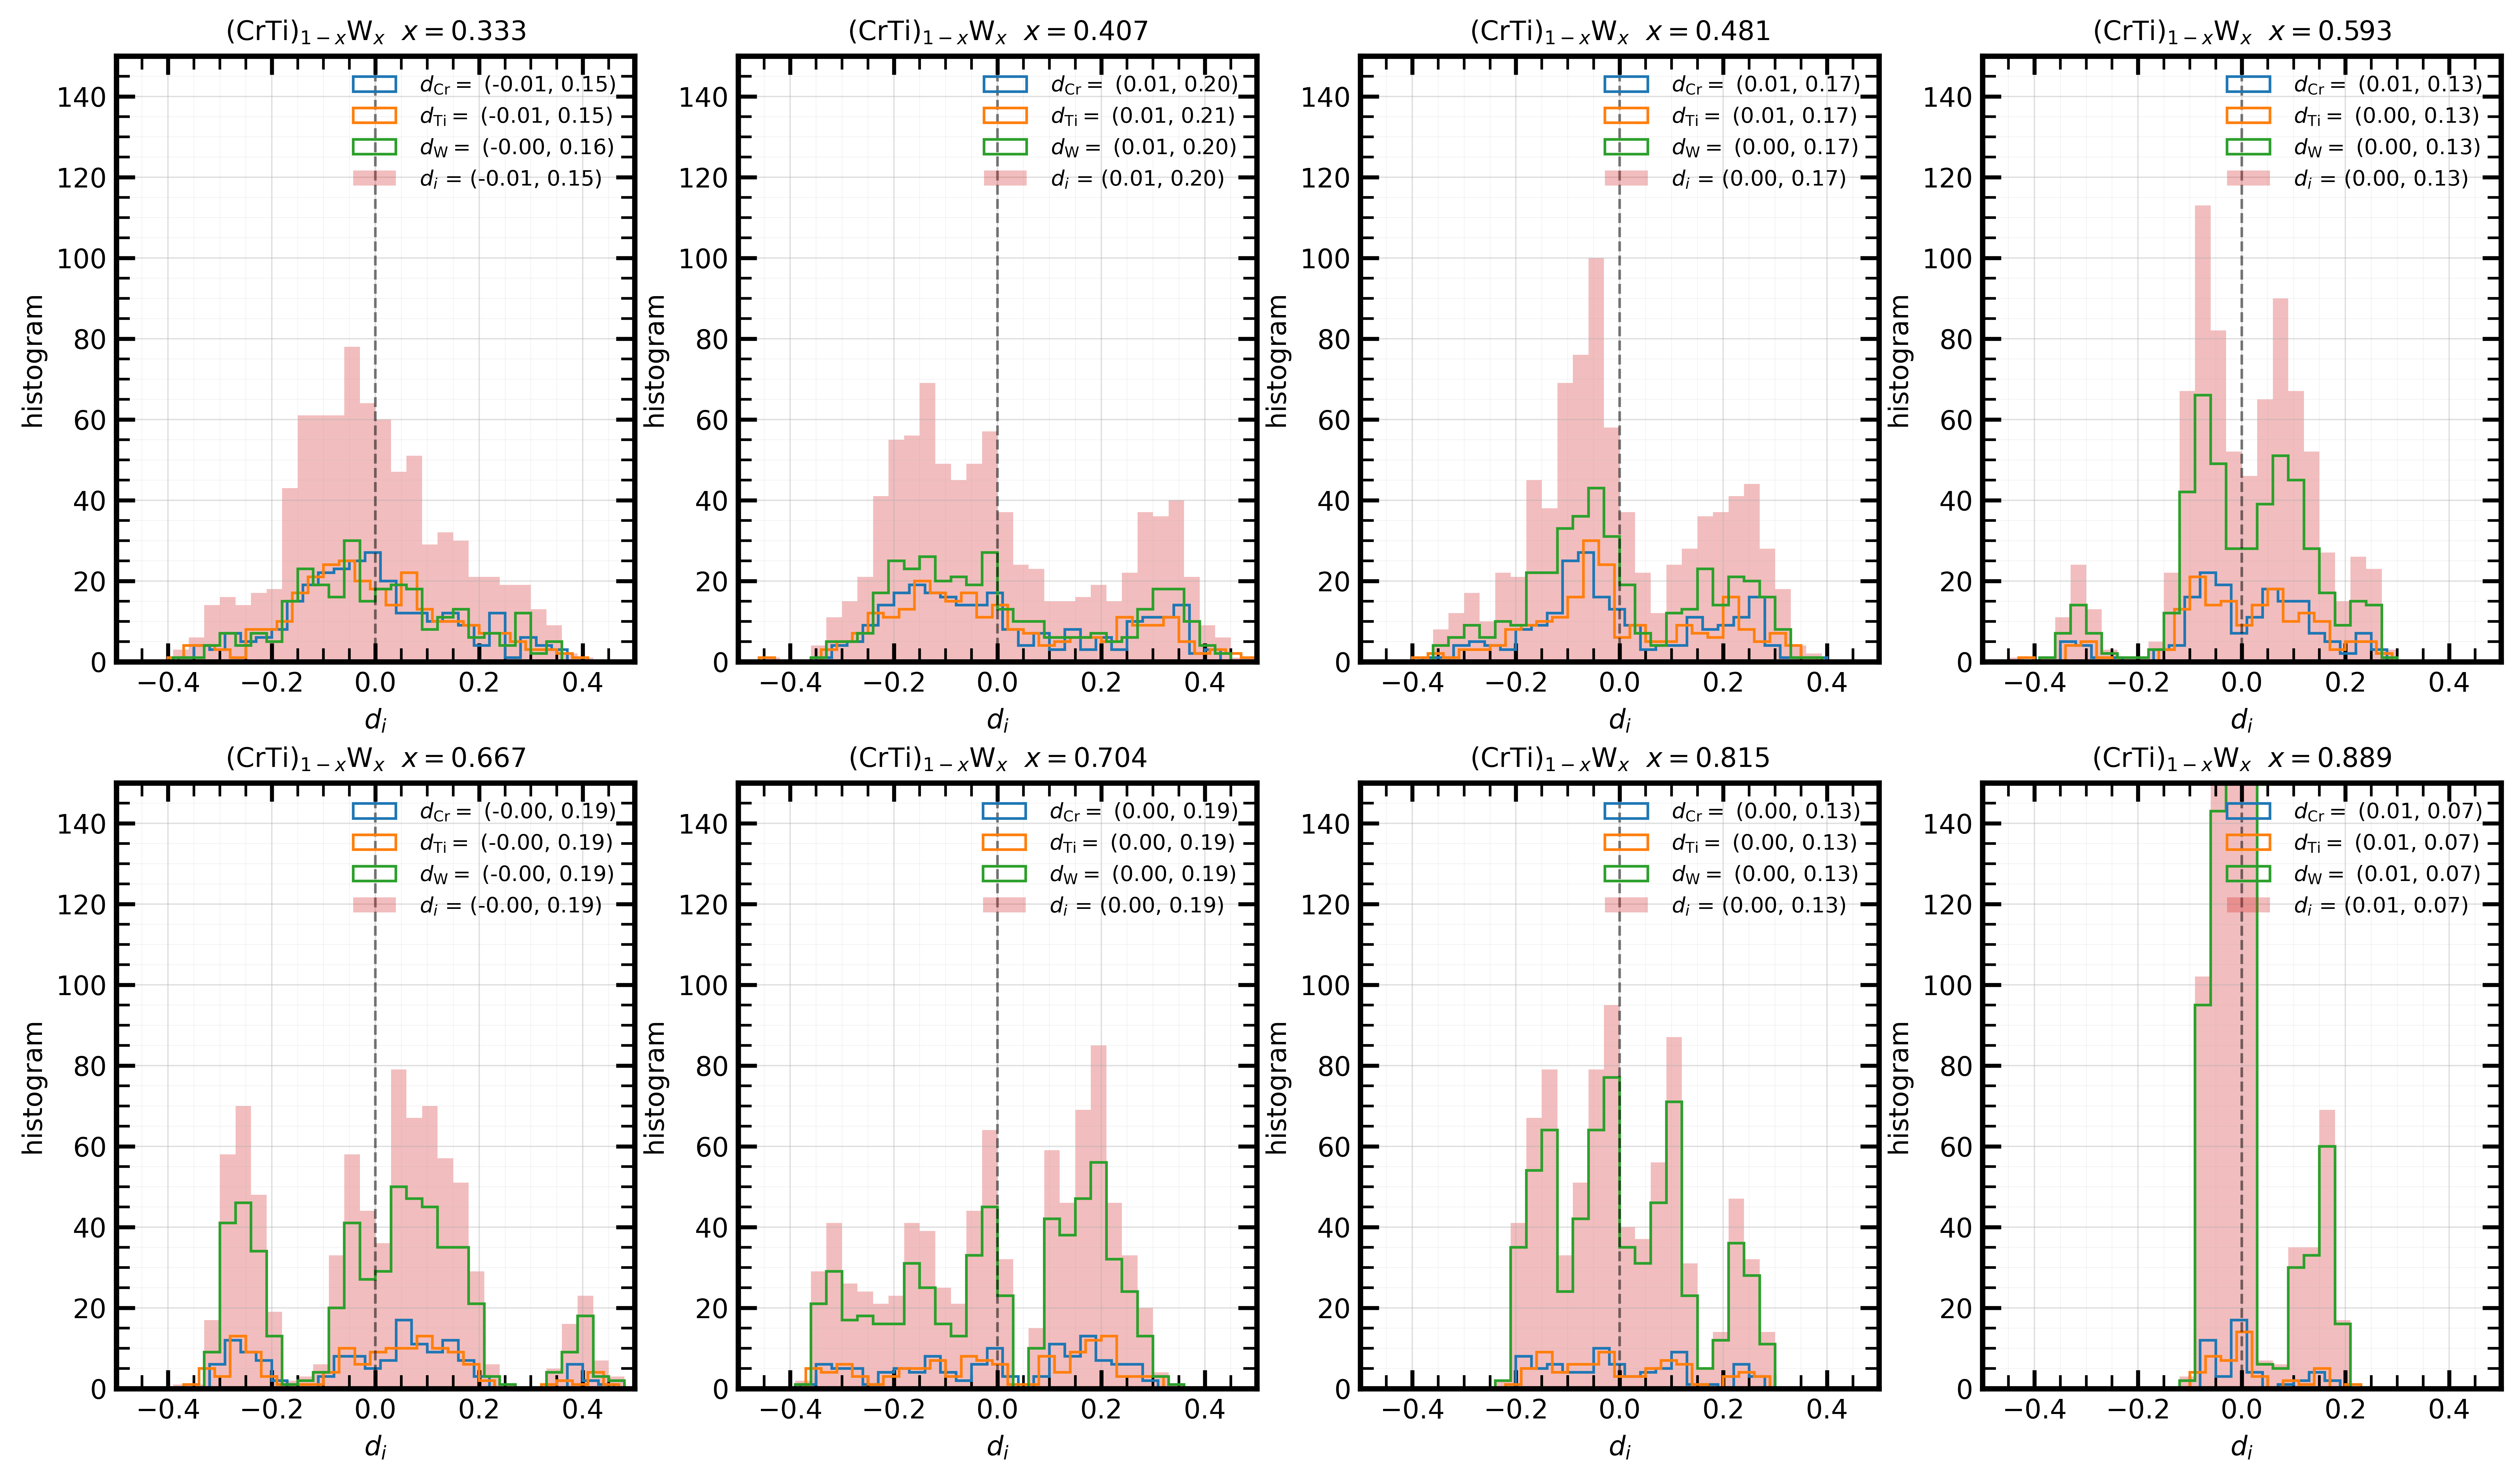

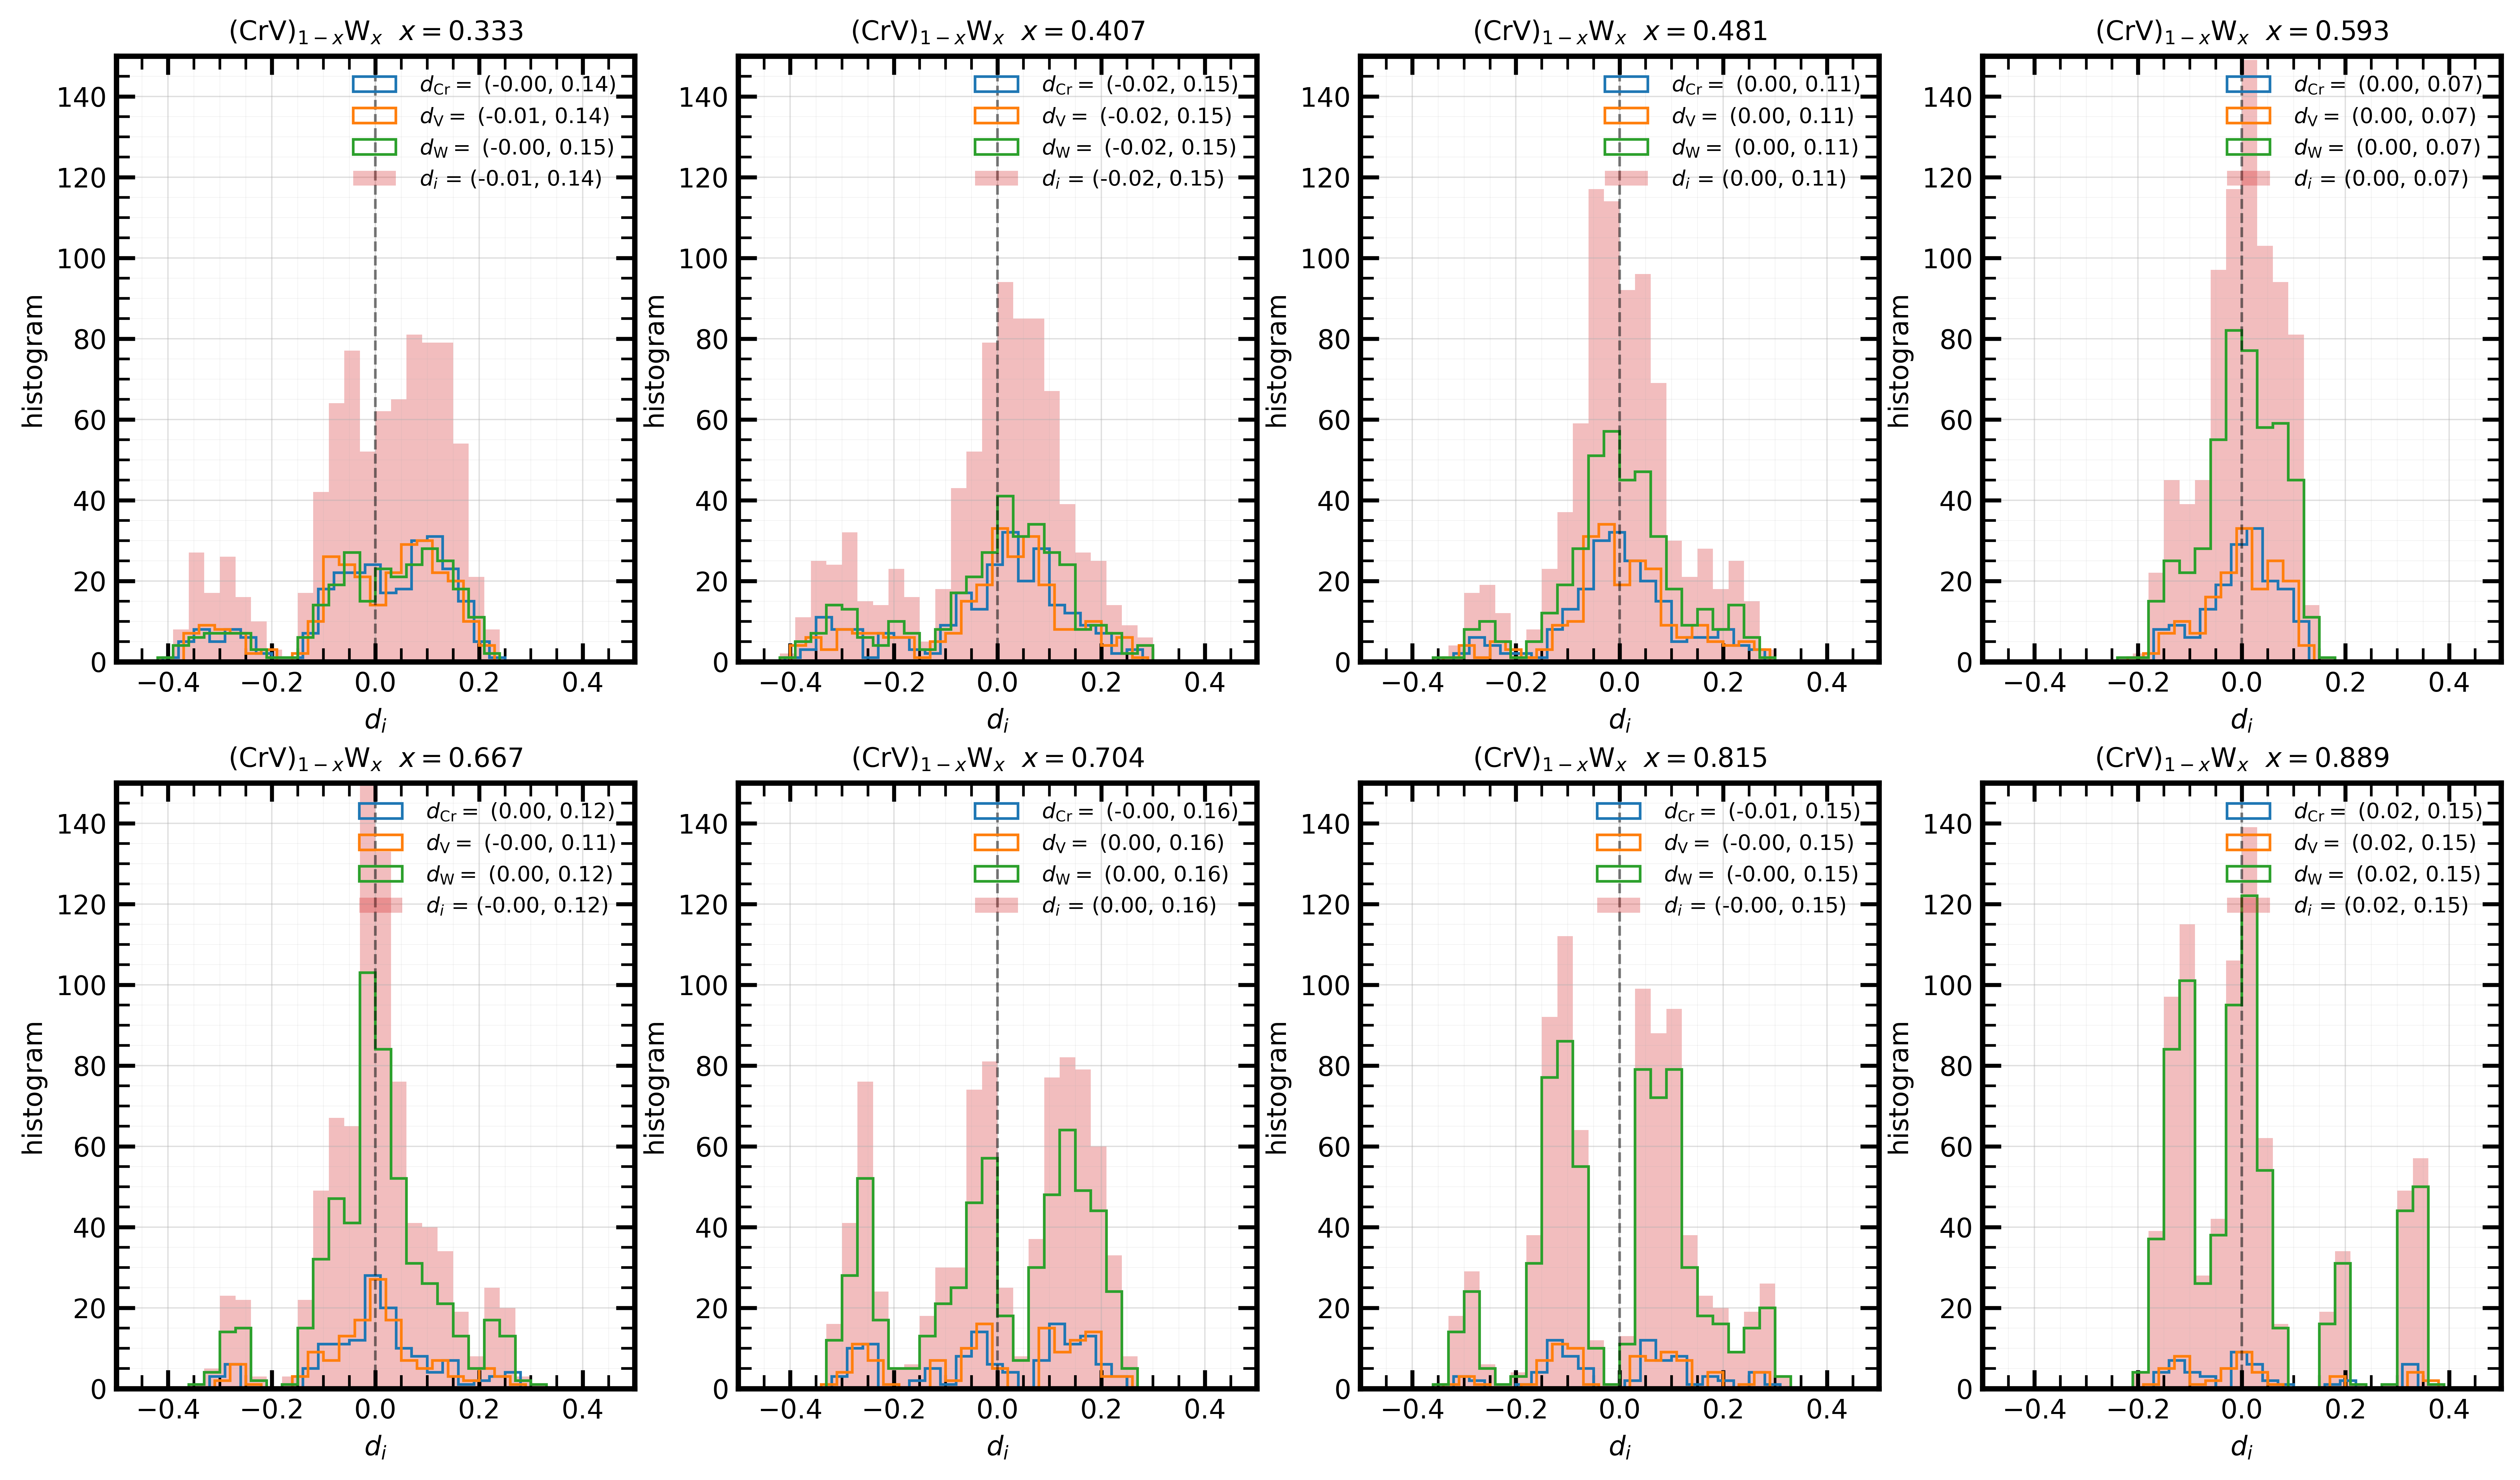

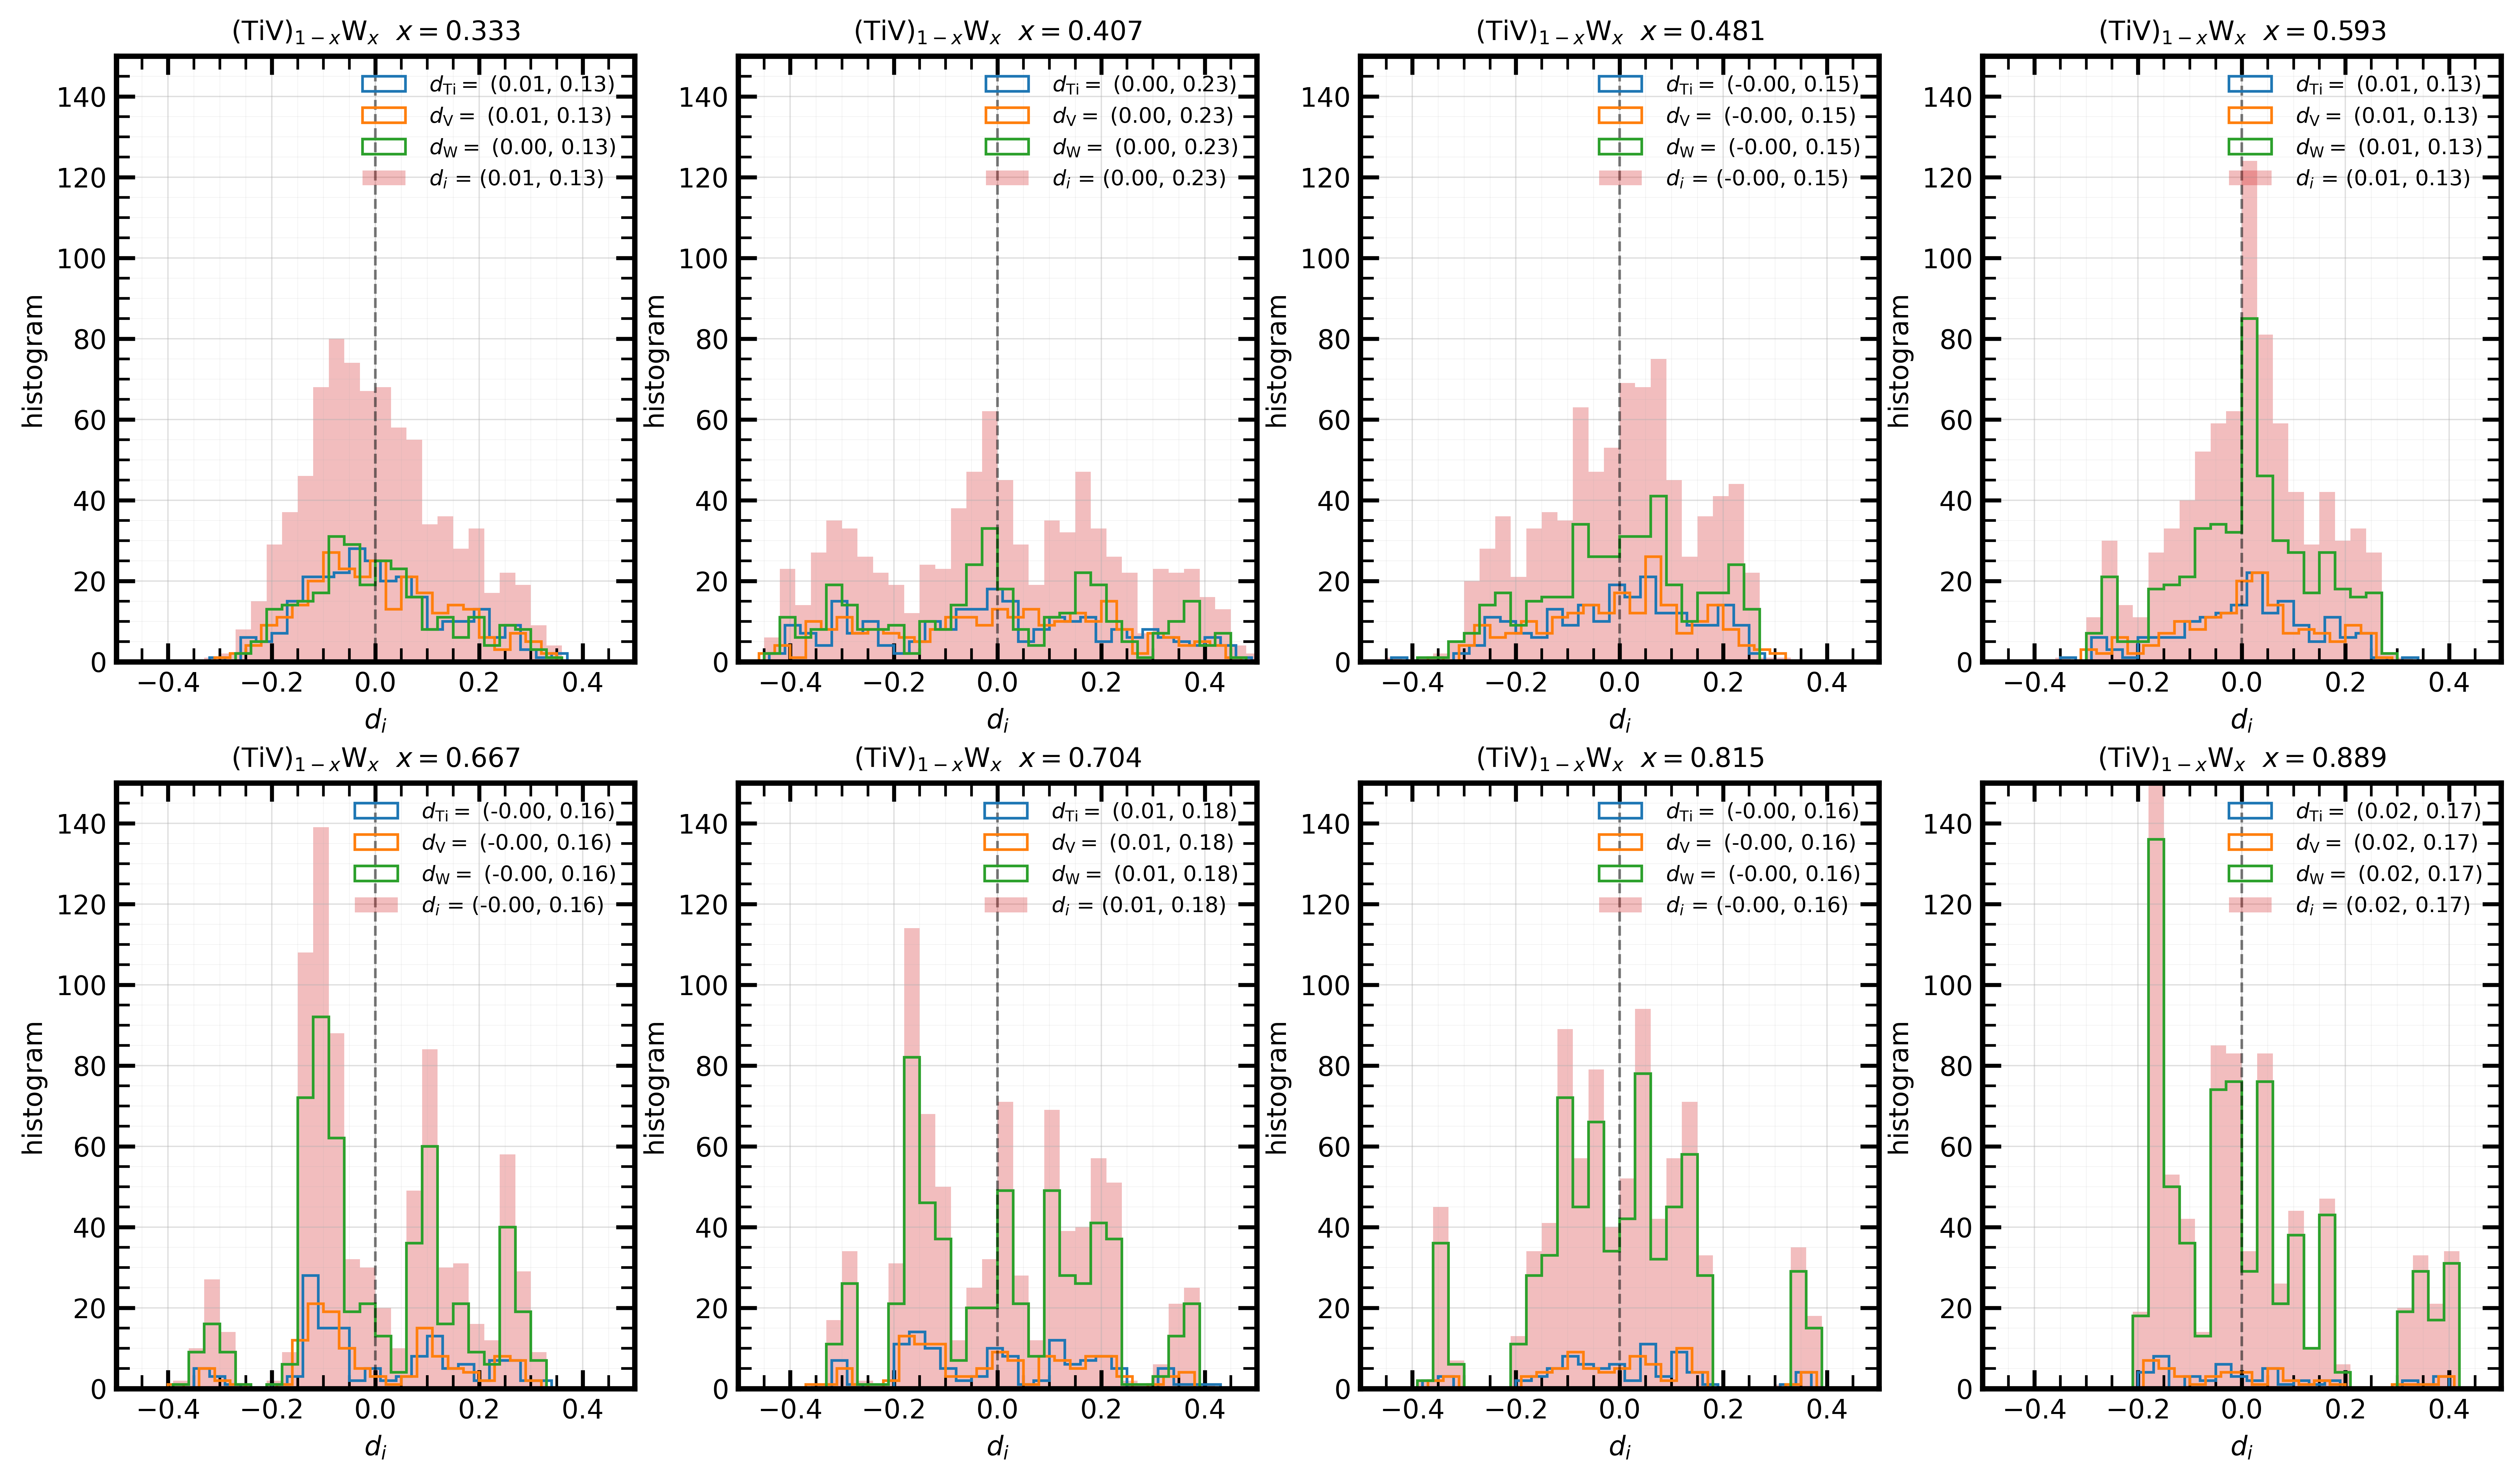

In [133]:
def selectData(data,type):
    indices = [i for i, value in enumerate(data['type']) if value == type]
    selected_data=[]
    for i in indices:
        selected_data.append([data['dx'][i],data['dy'][i],data['dz'][i]])
    selected_data=np.array(selected_data,dtype='float').flatten()
    return(selected_data)

bin_edges1 = np.arange(-0.5, 0.5, 0.03)
bin_edges2 = np.arange(-0.5, 0.5, 0.03)+0.01
bin_edges3 = np.arange(-0.5, 0.5, 0.03)+0.02
dirs=['Cr-Ti-W','Cr-V-W','Ti-V-W']
labels=['(CrTi)$_{1-x}$W$_x$','(CrV)$_{1-x}$W$_x$','(TiV)$_{1-x}$W$_x$']
for idir,dir in enumerate(dirs):
    types = dir.split('-')
    plotData=[]
    fig, axes = plt.subplots(2, 4, figsize=(16, 9))
    axes=axes.flatten()
    for wp in range(1,9):
        file='/pscratch/sd/k/kcpitike/MPEA/ternaries/{:s}/{:s}/displacements.csv'.format(dir,str(wp))
        data = pd.read_csv(file)
        x=data['type'].to_list().count('W')/(54*5)
        selectedData=selectData(data,types[0])
        axes[wp-1].hist(selectedData,bins=bin_edges1,label=' $d_{{\mathrm{{{}}}}} =$ ({:0.2f}, {:0.2f})'.format(types[0],np.mean(selectedData),np.std(selectedData)),histtype='step')
        selectedData=selectData(data,types[1])
        axes[wp-1].hist(selectedData,bins=bin_edges2,label=' $d_{{\mathrm{{{}}}}} =$ ({:0.2f}, {:0.2f})'.format(types[1],np.mean(selectedData),np.std(selectedData)),histtype='step')
        selectedData=selectData(data,types[2])
        axes[wp-1].hist(selectedData,bins=bin_edges3,label=' $d_{{\mathrm{{{}}}}} =$ ({:0.2f}, {:0.2f})'.format(types[2],np.mean(selectedData),np.std(selectedData)),histtype='step')
        axes[wp-1].hist(np.array(data[['dx','dy','dz']]).flatten(),bins=bin_edges3,histtype='stepfilled',alpha=0.3,\
                 label=' $d_i$ = ({:0.2f}, {:0.2f})'.format(np.mean(np.array(data[['dx','dy','dz']])),np.std(np.array(data[['dx','dy','dz']]))))#+' $d_i$ = ({:0.2f}, {:0.2f})'.format(np.mean(data[['dx','dy','dz']]),np.std(data[['dx','dy','dz']])))
        axes[wp-1].axvline(x=0,linestyle='--',c='black',alpha=0.5,linewidth=1)
        axes[wp-1].legend(frameon=0,fontsize=8)
        axes[wp-1].set_xlabel('$d_i$')
        axes[wp-1].set_ylabel('histogram')
        axes[wp-1].set_xlim([-0.5,0.5])
        axes[wp-1].set_ylim([0,150])
        axes[wp-1].set_title(labels[idir]+'  $x={:0.3f}$'.format(x))

        axes[wp-1].tick_params(axis='both',which='both',direction='in',colors='k',\
                    bottom=True,top=True,left=True,right=True,\
                    #labelbottom=True, labeltop=True, labelleft=True, labelright=True,\
                    labelrotation=0)
        axes[wp-1].xaxis.set_minor_locator(AutoMinorLocator())
        axes[wp-1].yaxis.set_minor_locator(AutoMinorLocator())
        axes[wp-1].grid(alpha=0.4,which='major',linewidth=0.5)
        axes[wp-1].grid(alpha=0.2,which='minor',linewidth=0.2)